In [203]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.linalg import norm
from scipy.linalg import eigh
import plotly_express as px
import seaborn as sns
sns.set(style='ticks')

In [204]:
OHCO = ['president', 'speech_id', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2] # Speeches
BOOKS = OHCO[:1] # Presidents

In [205]:
TOKENS = pd.read_csv("TOKEN.csv").set_index(OHCO).sort_index()
LIB = pd.read_csv("LIB1.csv").set_index('speech_id').sort_index()

In [206]:
VOCAB = pd.read_csv('VOCAB.csv').set_index('term_str')

In [207]:
def get_tfidf(TOKEN, bag, count_method='n', tf_method='sum', item_type='term_str'):
    
    # Create bag of items (terms or stems)
    BOW = TOKEN.groupby(bag+[item_type])[item_type].count()\
        .to_frame().rename(columns={item_type:'n'})

    # Add binary count column
    BOW['c'] = BOW.n.astype('bool').astype('int')
    
    # Create documnet-term count matrix
    DTCM = BOW[count_method].unstack().fillna(0).astype('int')

    # Compute TF
    if tf_method == 'sum':
        TF = DTCM.T / DTCM.T.sum()
    elif tf_method == 'max':
        TF = .4 + .6 * (DTCM.T / DTCM.T.max()) # See Manning, et al. for choice of α
    elif tf_method == 'log':
        TF = np.log10(DTCM.T + 1)
    elif tf_method == 'raw':
        TF = DTCM.T
    elif tf_method == 'binary':
        TF = DTCM.T.astype('bool').astype('int')
    
    # Compute IDF
    N = DTCM.shape[0]
    DF = DTCM[DTCM > 0].count()
    IDF = np.log10(N / DF)
    
    TFIDF = TF.T * IDF
    
    return TFIDF

In [208]:
TFIDF_chap = get_tfidf(TOKENS, CHAPS)
VOCAB['tfidf_chap_sum'] = TFIDF_chap.sum()

In [209]:
TFIDF_chap = TFIDF_chap.drop(['president'], axis=1)

In [210]:
TFIDF_chap_1 = TFIDF_chap.groupby(CHAPS).sum()
VOCAB['tfidf_chap_grouped_sum'] = TFIDF_chap_1.sum()

In [211]:
n_terms = 4000

In [212]:
VOCAB_SHORT = VOCAB.sort_values('tfidf_chap_grouped_sum', ascending=False).head(n_terms).index.tolist()
# VOCAB_SHORT = VOCAB.loc[VOCAB.tfidf_chap_sum >= VOCAB.tfidf_chap_sum.quantile(.75)].index.tolist()
TFIDF_chap_short = TFIDF_chap_1[VOCAB_SHORT]

In [213]:
TFIDF_chap_short

term_str                       applause       you        we  going  trump  \
president speech_id                                                         
adams     adams_speeches_001        0.0  0.000000  0.000090    0.0    0.0   
          adams_speeches_003        0.0  0.000000  0.000145    0.0    0.0   
          adams_speeches_006        0.0  0.000767  0.000156    0.0    0.0   
          adams_speeches_007        0.0  0.000000  0.000000    0.0    0.0   
arthur    arthur_speeches_000       0.0  0.000000  0.000260    0.0    0.0   
...                                 ...       ...       ...    ...    ...   
wilson    wilson_speeches_027       0.0  0.000000  0.000677    0.0    0.0   
          wilson_speeches_028       0.0  0.000226  0.000641    0.0    0.0   
          wilson_speeches_029       0.0  0.000245  0.000976    0.0    0.0   
          wilson_speeches_030       0.0  0.000144  0.000218    0.0    0.0   
          wilson_speeches_031       0.0  0.000253  0.000120    0.0    0.0   

term_str                          shall       our       she  hillary  clinton  \
president speech_id                                                             
adams     adams_speeches_001   0.000518  0.000118  0.000000      0.0      0.0   
          adams_speeches_003   0.000000  0.000569  0.000000      0.0      0.0   
          adams_speeches_006   0.000223  0.000339  0.000000      0.0      0.0   
          adams_speeches_007   0.000000  0.000000  0.000000      0.0      0.0   
arthur    arthur_speeches_000  0.000466  0.000269  0.000162      0.0      0.0   
...                                 ...       ...       ...      ...      ...   
wilson    wilson_speeches_027  0.000447  0.000170  0.000583      0.0      0.0   
          wilson_speeches_028  0.000714  0.000263  0.000000      0.0      0.0   
          wilson_speeches_029  0.001350  0.000399  0.000618      0.0      0.0   
          wilson_speeches_030  0.000293  0.000178  0.000408      0.0      0.0   
          wilson_speeches_031  0.000000  0.000203  0.000000      0.0      0.0   

term_str                       ...  diseases  monument  voluntarily  taft  \
president speech_id            ...                                          
adams     adams_speeches_001   ...       0.0       0.0     0.000000   0.0   
          adams_speeches_003   ...       0.0       0.0     0.000000   0.0   
          adams_speeches_006   ...       0.0       0.0     0.000000   0.0   
          adams_speeches_007   ...       0.0       0.0     0.000000   0.0   
arthur    arthur_speeches_000  ...       0.0       0.0     0.000000   0.0   
...                            ...       ...       ...          ...   ...   
wilson    wilson_speeches_027  ...       0.0       0.0     0.000000   0.0   
          wilson_speeches_028  ...       0.0       0.0     0.000218   0.0   
          wilson_speeches_029  ...       0.0       0.0     0.000000   0.0   
          wilson_speeches_030  ...       0.0       0.0     0.000000   0.0   
          wilson_speeches_031  ...       0.0       0.0     0.000000   0.0   

term_str                       reserved  commissions  embarrassments  aimed  \
president speech_id                                                           
adams     adams_speeches_001        0.0          0.0             0.0    0.0   
          adams_speeches_003        0.0          0.0             0.0    0.0   
          adams_speeches_006        0.0          0.0             0.0    0.0   
          adams_speeches_007        0.0          0.0             0.0    0.0   
arthur    arthur_speeches_000       0.0          0.0             0.0    0.0   
...                                 ...          ...             ...    ...   
wilson    wilson_speeches_027       0.0          0.0             0.0    0.0   
          wilson_speeches_028       0.0          0.0             0.0    0.0   
          wilson_speeches_029       0.0          0.0             0.0    0.0   
          wilson_speeches_030       0.0          0.0             0.0    0

In [214]:
TFIDF_chap_short = TFIDF_chap_short.apply(lambda x: x / np.sqrt(np.square(x).sum()), axis=1)
TFIDF_chap_short = TFIDF_chap_short - TFIDF_chap_short.mean()

In [215]:
#COV = TFIDF_book_short.T.dot(TFIDF_book_short) / (TFIDF_book_short.shape[0] - 1)

COV = TFIDF_chap_short.T.dot(TFIDF_chap_short) / (TFIDF_chap_short.shape[0] - 1)

COV.head()

term_str  applause       you        we     going     trump     shall  \
term_str                                                               
applause  0.030105  0.004737  0.001285  0.007201  0.009309 -0.001545   
you       0.004737  0.003122  0.000799  0.002454  0.002342 -0.000593   
we        0.001285  0.000799  0.001629  0.000555  0.000293 -0.000243   
going     0.007201  0.002454  0.000555  0.004737  0.004172 -0.000631   
trump     0.009309  0.002342  0.000293  0.004172  0.007343 -0.000625   

term_str       our       she   hillary   clinton  ...      diseases  monument  \
term_str                                          ...                           
applause  0.000097  0.004408  0.006634  0.005569  ... -8.235574e-06 -0.000077   
you       0.000062  0.001145  0.001592  0.001398  ... -9.954718e-07 -0.000035   
we        0.000613  0.000215  0.000257  0.000218  ...  2.995459e-05 -0.000008   
going    -0.000077  0.002098  0.002845  0.002399  ... -2.063028e-05 -0.000032   
trump    -0.000125  0.002489  0.003654  0.003322  ... -3.070825e-05 -0.000039   

term_str  voluntarily      taft  reserved  commissions  embarrassments  \
term_str                                                                 
applause    -0.000091 -0.000097 -0.000094    -0.000111       -0.000154   
you         -0.000040  0.000006 -0.000037    -0.000049       -0.000068   
we          -0.000023  0.000007 -0.000025    -0.000022       -0.000071   
going       -0.000034 -0.000017 -0.000051    -0.000045       -0.000068   
trump       -0.000040 -0.000042 -0.000053    -0.000040       -0.000062   

term_str     aimed   hearing    humane  
term_str                                
applause -0.000120  0.000088 -0.000120  
you      -0.000008  0.000031 -0.000034  
we        0.000052  0.000024 -0.000020  
going    -0.000033  0.000046 -0.000049  
trump    -0.000050  0.000026 -0.000053  

[5 rows x 4000 columns]

In [216]:
%time eig_vals, eig_vecs = eigh(COV)

CPU times: user 26.5 s, sys: 5.68 s, total: 32.1 s
Wall time: 7.48 s


In [217]:
EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
EIG_VAL.index.name = 'term_str'
EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)

<AxesSubplot:xlabel='term_str'>

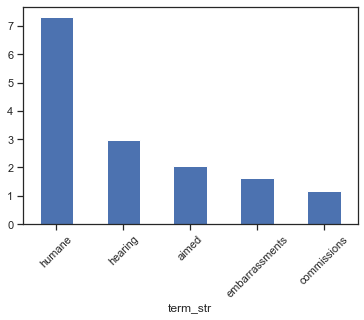

In [218]:
EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)
EIG_PAIRS.exp_var.sort_values(ascending=False).head().plot.bar(rot=45)

In [219]:
COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(10).reset_index(drop=True)
COMPS.index.name = 'comp_id'
COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
COMPS.index.name = 'pc_id'

In [220]:
COMPS.iloc[:,1:-1].T.sort_values('PC1', ascending=False).head(10).index

Index(['applause', 'trump', 'hillary', 'clinton', 'mexico', 'treasury',
       'constitution', 'territory', 'she', 'upon'],
      dtype='object')

In [221]:
VOCAB.loc[[x for x in EIG_PAIRS.sort_values('exp_var', ascending=False).head(10).index]]

n  num  stop       p_stem pos_max  df       idf  \
term_str                                                            
humane           66    0     0        human     NNP  55  3.985169   
hearing         115    0     0         hear     NNP  90  3.274676   
aimed            58    0     0          aim      JJ  46  4.242967   
embarrassments   84    0     0    embarrass     NNP  38  4.518601   
commissions      77    0     0      commiss      JJ  43  4.340264   
reserved         89    0     0       reserv      NN  62  3.812333   
taft             40    0     0         taft     VBG  19  5.518601   
voluntarily      73    0     0  voluntarili     VBN  56  3.959174   
monument         49    0     0     monument      NN  30  4.859638   
diseases         70    0     0       diseas     NaN  46  4.242967   

                tfidf_sum_speech_max       dfidf     dpidp  tfidf_chap_sum  \
term_str                                                                     
humane                    263.021167  219.184306  0.251647        0.022566   
hearing                   376.587718  294.720823  0.338371        0.022568   
aimed                     246.092083  195.176480  0.224083        0.022570   
embarrassments            379.562517  171.706853  0.197138        0.022571   
commissions               334.200340  186.631359  0.214273        0.022571   
reserved                  339.297601  236.364621  0.271372        0.022601   
taft                      220.744056  104.853427  0.120383        0.022603   
voluntarily               289.019701  221.713743  0.254551        0.022606   
monument                  238.122277  145.789149  0.167381        0.022606   
diseases                  297.007687  195.176480  0.224083        0.022612   

                tfidf_chap_grouped_sum  
term_str                                
humane                        0.022566  
hearing                       0.022568  
aimed                         0.022570  
embarrassments                0.022571  
commissions                   0.022571  
reserved                      0.022601  
taft                          0.022603  
voluntarily                   0.022606  
monument                      0.022606  
diseases                      0.022612

In [222]:
LOADINGS = COMPS[COV.index].T
LOADINGS.index.name = 'term_str'

In [223]:
LOADINGS.head().style.background_gradient(cmap='YlGn')

In [224]:
top_terms = {}
for i in [0, 1]:
    for j in [0, 1]:
      top_terms[f"{i}_{j}"] = ' '.join(LOADINGS.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())

In [225]:
top_terms

{'0_0': 'upon shall treaty constitution treasury duties territory laws public present',
 '0_1': 'applause trump going hillary you clinton she thats dont jobs',
 '1_0': 'applause trump hillary clinton mexico treasury constitution territory she upon',
 '1_1': 'we soviet tonight q vietnam mr budget freedom world americans'}

In [226]:
COMPS[COV.index]

applause       you        we     going     trump     shall       our  \
pc_id                                                                         
PC0   -0.596481 -0.151161 -0.052283 -0.214214 -0.254070  0.052608 -0.004148   
PC1    0.257370 -0.054064 -0.158691  0.064232  0.151679  0.057852 -0.057413   
PC2   -0.110184 -0.044072 -0.111440 -0.019105  0.009200 -0.007538 -0.089544   
PC3   -0.254282  0.150526 -0.002797  0.158786  0.069010 -0.025600 -0.047196   
PC4    0.029640  0.016336  0.079066  0.057403  0.114859  0.008916  0.043617   
PC5    0.478773 -0.030931 -0.000706 -0.178249 -0.232114 -0.026133 -0.000380   
PC6   -0.369189  0.067768 -0.018277  0.099279  0.082898 -0.026271  0.007710   
PC7    0.017746  0.105225  0.056053 -0.007711 -0.054921  0.093700  0.018925   
PC8   -0.039598 -0.002677  0.016054  0.029346  0.091450  0.037051  0.011730   
PC9   -0.003442 -0.016673  0.028806  0.009266  0.005328  0.040954  0.010174   

            she   hillary   clinton  ...  diseases  monument  voluntarily  \
pc_id                                ...                                    
PC0   -0.123681 -0.173288 -0.151160  ...  0.000311  0.002263     0.003588   
PC1    0.068231  0.104217  0.079271  ... -0.004331  0.000173     0.006016   
PC2   -0.013136 -0.006360 -0.002224  ... -0.008385 -0.000706    -0.004320   
PC3    0.024069  0.027021  0.026488  ... -0.001303 -0.001976     0.000466   
PC4    0.077599  0.085701  0.050292  ... -0.009247  0.005179    -0.000847   
PC5   -0.117323 -0.131917 -0.108303  ...  0.007035 -0.000139     0.003949   
PC6    0.092666  0.039762  0.044481  ...  0.002306 -0.000343     0.007907   
PC7   -0.018333 -0.040262 -0.025669  ... -0.005762  0.000817     0.005975   
PC8    0.014745  0.068079  0.051983  ...  0.002087 -0.007192     0.002586   
PC9    0.012190  0.019572  0.003236  ... -0.001460 -0.000712     0.005338   

           taft  reserved  commissions  embarrassments     aimed   hearing  \
pc_id                                                                        
PC0    0.001373  0.004857     0.003932        0.007666  0.001967 -0.002316   
PC1   -0.003984  0.009316     0.005311        0.018370 -0.006955 -0.000430   
PC2   -0.000692 -0.008665    -0.005398       -0.017815 -0.005054 -0.006921   
PC3    0.007268 -0.000610     0.002400        0.003273 -0.000889  0.004121   
PC4   -0.010367  0.001968    -0.005289        0.000242  0.001426 -0.004064   
PC5   -0.005142  0.004456     0.000017        0.006608 -0.002085  0.000840   
PC6   -0.007860  0.003818     0.000832        0.006546  0.002165  0.001170   
PC7    0.001344  0.011015    -0.001966       -0.000446  0.002345  0.002295   
PC8    0.001053  0.004757    -0.001099        0.008675  0.000316  0.001445   
PC9    0.002235  0.003821     0.002909       -0.001495  0.000673  0.000498   

         humane  
pc_id            
PC0    0.004244  
PC1    0.003444  
PC2   -0.006628  
PC3   -0.000830  
PC4    0.009165  
PC5    0.003351  
PC6    0.001681  
PC7    0.000856  
PC8   -0.000080  
PC9   -0.000414  

[10 rows x 4000 columns]

In [227]:
TFIDF_chap_short

term_str                       applause       you        we     going  \
president speech_id                                                     
adams     adams_speeches_001  -0.071503 -0.043994 -0.035419 -0.032062   
          adams_speeches_003  -0.071503 -0.043994 -0.037960 -0.032062   
          adams_speeches_006  -0.071503 -0.003360 -0.035885 -0.032062   
          adams_speeches_007  -0.071503 -0.043994 -0.044127 -0.032062   
arthur    arthur_speeches_000 -0.071503 -0.043994 -0.032813 -0.032062   
...                                 ...       ...       ...       ...   
wilson    wilson_speeches_027 -0.071503 -0.043994  0.007164 -0.032062   
          wilson_speeches_028 -0.071503 -0.018439  0.028442 -0.032062   
          wilson_speeches_029 -0.071503 -0.019582  0.053255 -0.032062   
          wilson_speeches_030 -0.071503 -0.029409 -0.022038 -0.032062   
          wilson_speeches_031 -0.071503 -0.022661 -0.034030 -0.032062   

term_str                          trump     shall       our       she  \
president speech_id                                                     
adams     adams_speeches_001  -0.028542  0.027903 -0.014352 -0.020602   
          adams_speeches_003  -0.028542 -0.021993 -0.001568 -0.020602   
          adams_speeches_006  -0.028542 -0.010186 -0.007788 -0.020602   
          adams_speeches_007  -0.028542 -0.021993 -0.025718 -0.020602   
arthur    arthur_speeches_000 -0.028542 -0.001733 -0.014027 -0.013560   
...                                 ...       ...       ...       ...   
wilson    wilson_speeches_027 -0.028542  0.011918 -0.012844  0.023602   
          wilson_speeches_028 -0.028542  0.058861  0.004101 -0.020602   
          wilson_speeches_029 -0.028542  0.112778  0.014137  0.041039   
          wilson_speeches_030 -0.028542  0.007672 -0.007698  0.020645   
          wilson_speeches_031 -0.028542 -0.021993 -0.008586 -0.020602   

term_str                        hillary   clinton  ...  diseases  monument  \
president speech_id                                ...                       
adams     adams_speeches_001  -0.018721 -0.018009  ... -0.001587 -0.001371   
          adams_speeches_003  -0.018721 -0.018009  ... -0.001587 -0.001371   
          adams_speeches_006  -0.018721 -0.018009  ... -0.001587 -0.001371   
          adams_speeches_007  -0.018721 -0.018009  ... -0.001587 -0.001371   
arthur    arthur_speeches_000 -0.018721 -0.018009  ... -0.001587 -0.001371   
...                                 ...       ...  ...       ...       ...   
wilson    wilson_speeches_027 -0.018721 -0.018009  ... -0.001587 -0.001371   
          wilson_speeches_028 -0.018721 -0.018009  ... -0.001587 -0.001371   
          wilson_speeches_029 -0.018721 -0.018009  ... -0.001587 -0.001371   
          wilson_speeches_030 -0.018721 -0.018009  ... -0.001587 -0.001371   
          wilson_speeches_031 -0.018721 -0.018009  ... -0.001587 -0.001371   

term_str                       voluntarily      taft  reserved  commissions  \
president speech_id                                                           
adams     adams_speeches_001     -0.001747 -0.001453 -0.001844    -0.001668   
          adams_speeches_003     -0.001747 -0.001453 -0.001844    -0.001668   
          adams_speeches_006     -0.001747 -0.001453 -0.001844    -0.001668   
          adams_speeches_007     -0.001747 -0.001453 -0.001844    -0.001668   
arthur    arthur_speeches_000    -0.001747 -0.001453 -0.001844    -0.001668   
...                                    ...       ...       ...          ...   
wilson    wilson_speeches_027    -0.001747 -0.001453 -0.001844    -0.001668   
          wilson_speeches_028     0.022911 -0.001453 -0.001844    -0.001668   
          wilson_speeches_029    -0.001747 -0.001453 -0.001844    -0.001668   
          wilson_speeches_030    -0.001747 -0.001453 -0.001844    -0.001668   
          wilson_speeches_031    -0.001747 -0.001453 -0.001844    -0.001668   

term_str                       embarrassments     aimed  

In [228]:
DCM = TFIDF_chap_short.dot(COMPS[COV.index].T)

In [229]:
DCM

pc_id                               PC0       PC1       PC2       PC3  \
president speech_id                                                     
adams     adams_speeches_001   0.191993  0.092995 -0.062755 -0.061443   
          adams_speeches_003   0.124730  0.036993  0.143625 -0.074163   
          adams_speeches_006   0.097475 -0.010102  0.137761 -0.017142   
          adams_speeches_007   0.086809  0.028518  0.276464 -0.052268   
arthur    arthur_speeches_000  0.137767  0.101623  0.113993 -0.011294   
...                                 ...       ...       ...       ...   
wilson    wilson_speeches_027  0.144139 -0.013443 -0.013134 -0.051704   
          wilson_speeches_028  0.161545 -0.005873 -0.192927 -0.009220   
          wilson_speeches_029  0.139584 -0.035526 -0.075490 -0.058037   
          wilson_speeches_030  0.186994  0.029601 -0.262163 -0.006137   
          wilson_speeches_031  0.191346  0.074988 -0.197348 -0.002762   

pc_id                               PC4       PC5       PC6       PC7  \
president speech_id                                                     
adams     adams_speeches_001   0.089217 -0.013310 -0.002608  0.206904   
          adams_speeches_003  -0.013120 -0.015401 -0.013318  0.043678   
          adams_speeches_006   0.011765 -0.019131 -0.013785  0.089572   
          adams_speeches_007  -0.107116 -0.017583 -0.000856 -0.011097   
arthur    arthur_speeches_000  0.004428  0.027615  0.031902 -0.095872   
...                                 ...       ...       ...       ...   
wilson    wilson_speeches_027  0.182547 -0.079775 -0.069637  0.049006   
          wilson_speeches_028  0.093158 -0.130947 -0.151825 -0.009468   
          wilson_speeches_029  0.203263 -0.119478 -0.105434  0.075156   
          wilson_speeches_030 -0.031968 -0.121800 -0.163527 -0.062683   
          wilson_speeches_031 -0.058701 -0.066490 -0.108449 -0.058926   

pc_id                               PC8       PC9  
president speech_id                                
adams     adams_speeches_001   0.053746 -0.016433  
          adams_speeches_003  -0.040129 -0.016451  
          adams_speeches_006  -0.014788 -0.049309  
          adams_speeches_007  -0.031886  0.017819  
arthur    arthur_speeches_000 -0.162114 -0.020010  
...                                 ...       ...  
wilson    wilson_speeches_027 -0.035091 -0.025605  
          wilson_speeches_028  0.040269 -0.024385  
          wilson_speeches_029  0.018423 -0.016293  
          wilson_speeches_030  0.049251 -0.026357  
          wilson_speeches_031  0.048119 -0.013783  

[871 rows x 10 columns]

In [230]:
LIB.reset_index()

speech_id president  \
0     HClinton_2016_07_28  hclinton   
1     HClinton_2016_07_29  hclinton   
2     HClinton_2016_08_01  hclinton   
3     HClinton_2016_08_05  hclinton   
4     HClinton_2016_08_10  hclinton   
...                   ...       ...   
1075  wilson_speeches_027    wilson   
1076  wilson_speeches_028    wilson   
1077  wilson_speeches_029    wilson   
1078  wilson_speeches_030    wilson   
1079  wilson_speeches_031    wilson   

                                           speech_title  \
0     Hillary Clinton delivers remarks at the 2016 D...   
1     Democratic presidential candidate Hillary Clin...   
2     Hillary Clinton (D), Presidential Candidate, R...   
3     Hillary Clinton delivers remarks at the Nation...   
4     Hillary Clinton holds a campaign rally in Des ...   
...                                                 ...   
1075                     Wilson&#8217;s Fourteen Points   
1076                               Sixth Annual Message   
1077                               Fifth Annual Message   
1078                             Seventh Annual Message   
1079                              Eighth Annual Message   

                                               src_file  
0     ./Total_Corpus of Presidential Speeches/HClint...  
1     ./Total_Corpus of Presidential Speeches/HClint...  
2     ./Total_Corpus of Presidential Speeches/HClint...  
3     ./Total_Corpus of Presidential Speeches/HClint...  
4     ./Total_Corpus of Presidential Speeches/HClint...  
...                                                 ...  
1075  ./Total_Corpus of Presidential Speeches/wilson...  
1076  ./Total_Corpus of Presidential Speeches/wilson...  
1077  ./Total_Corpus of Presidential Speeches/wilson...  
1078  ./Total_Corpus of Presidential Speeches/wilson...  
1079  ./Total_Corpus of Presidential Speeches/wilson...  

[1080 rows x 4 columns]

In [231]:
LIB

president  \
speech_id                       
HClinton_2016_07_28  hclinton   
HClinton_2016_07_29  hclinton   
HClinton_2016_08_01  hclinton   
HClinton_2016_08_05  hclinton   
HClinton_2016_08_10  hclinton   
...                       ...   
wilson_speeches_027    wilson   
wilson_speeches_028    wilson   
wilson_speeches_029    wilson   
wilson_speeches_030    wilson   
wilson_speeches_031    wilson   

                                                          speech_title  \
speech_id                                                                
HClinton_2016_07_28  Hillary Clinton delivers remarks at the 2016 D...   
HClinton_2016_07_29  Democratic presidential candidate Hillary Clin...   
HClinton_2016_08_01  Hillary Clinton (D), Presidential Candidate, R...   
HClinton_2016_08_05  Hillary Clinton delivers remarks at the Nation...   
HClinton_2016_08_10  Hillary Clinton holds a campaign rally in Des ...   
...                                                                ...   
wilson_speeches_027                     Wilson&#8217;s Fourteen Points   
wilson_speeches_028                               Sixth Annual Message   
wilson_speeches_029                               Fifth Annual Message   
wilson_speeches_030                             Seventh Annual Message   
wilson_speeches_031                              Eighth Annual Message   

                                                              src_file  
speech_id                                                               
HClinton_2016_07_28  ./Total_Corpus of Presidential Speeches/HClint...  
HClinton_2016_07_29  ./Total_Corpus of Presidential Speeches/HClint...  
HClinton_2016_08_01  ./Total_Corpus of Presidential Speeches/HClint...  
HClinton_2016_08_05  ./Total_Corpus of Presidential Speeches/HClint...  
HClinton_2016_08_10  ./Total_Corpus of Presidential Speeches/HClint...  
...                                                                ...  
wilson_speeches_027  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_028  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_029  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_030  ./Total_Corpus of Presidential Speeches/wilson...  
wilson_speeches_031  ./Total_Corpus of Presidential Speeches/wilson...  

[1080 rows x 3 columns]

In [232]:
DCM = DCM.join(LIB[['president','speech_title']], on='speech_id')

In [233]:
DCM

PC0       PC1       PC2       PC3  \
president speech_id                                                     
adams     adams_speeches_001   0.191993  0.092995 -0.062755 -0.061443   
          adams_speeches_003   0.124730  0.036993  0.143625 -0.074163   
          adams_speeches_006   0.097475 -0.010102  0.137761 -0.017142   
          adams_speeches_007   0.086809  0.028518  0.276464 -0.052268   
arthur    arthur_speeches_000  0.137767  0.101623  0.113993 -0.011294   
...                                 ...       ...       ...       ...   
wilson    wilson_speeches_027  0.144139 -0.013443 -0.013134 -0.051704   
          wilson_speeches_028  0.161545 -0.005873 -0.192927 -0.009220   
          wilson_speeches_029  0.139584 -0.035526 -0.075490 -0.058037   
          wilson_speeches_030  0.186994  0.029601 -0.262163 -0.006137   
          wilson_speeches_031  0.191346  0.074988 -0.197348 -0.002762   

                                    PC4       PC5       PC6       PC7  \
president speech_id                                                     
adams     adams_speeches_001   0.089217 -0.013310 -0.002608  0.206904   
          adams_speeches_003  -0.013120 -0.015401 -0.013318  0.043678   
          adams_speeches_006   0.011765 -0.019131 -0.013785  0.089572   
          adams_speeches_007  -0.107116 -0.017583 -0.000856 -0.011097   
arthur    arthur_speeches_000  0.004428  0.027615  0.031902 -0.095872   
...                                 ...       ...       ...       ...   
wilson    wilson_speeches_027  0.182547 -0.079775 -0.069637  0.049006   
          wilson_speeches_028  0.093158 -0.130947 -0.151825 -0.009468   
          wilson_speeches_029  0.203263 -0.119478 -0.105434  0.075156   
          wilson_speeches_030 -0.031968 -0.121800 -0.163527 -0.062683   
          wilson_speeches_031 -0.058701 -0.066490 -0.108449 -0.058926   

                                    PC8       PC9 president  \
president speech_id                                           
adams     adams_speeches_001   0.053746 -0.016433     adams   
          adams_speeches_003  -0.040129 -0.016451     adams   
          adams_speeches_006  -0.014788 -0.049309     adams   
          adams_speeches_007  -0.031886  0.017819     adams   
arthur    arthur_speeches_000 -0.162114 -0.020010    arthur   
...                                 ...       ...       ...   
wilson    wilson_speeches_027 -0.035091 -0.025605    wilson   
          wilson_speeches_028  0.040269 -0.024385    wilson   
          wilson_speeches_029  0.018423 -0.016293    wilson   
          wilson_speeches_030  0.049251 -0.026357    wilson   
          wilson_speeches_031  0.048119 -0.013783    wilson   

                                                                    speech_title  
president speech_id                                                               
adams     adams_speeches_001                                   Inaugural Address  
          adams_speeches_003   Proclamation of Day of Fasting, Humiliation an...  
          adams_speeches_006                         Death of George Washington   
          adams_speeches_007   Proclamation of Pardons to Those Engaged in Fr...  
arthur    arthur_speeches_000                  Veto of the Chinese Exclusion Act  
...                                                                          ...  
wilson    wilson_speeches_027                     Wilson&#8217;s Fourteen Points  
          wilson_speeches_028                               Sixth Annual Message  
          wilson_speeches_029                               Fifth Annual Message  
          wilson_speeches_030                             Seventh Annual Message  
          wilson_speeches_031                              Eighth Annual Message  

[871 rows x 12 columns]

In [234]:
#DCM['doc'] = DCM.apply(lambda x: "{}-{}-{}".format(x.president, x.speech_id, x.name[1]), 1)

In [235]:
DCM.iloc[:,:10].head().style.background_gradient(cmap='YlGn')

In [236]:
def vis_pcs(M, a, b, label= None, hover_name='president', symbol=None, size=None):
    fig = px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=800)
    fig.show()  # label='author'

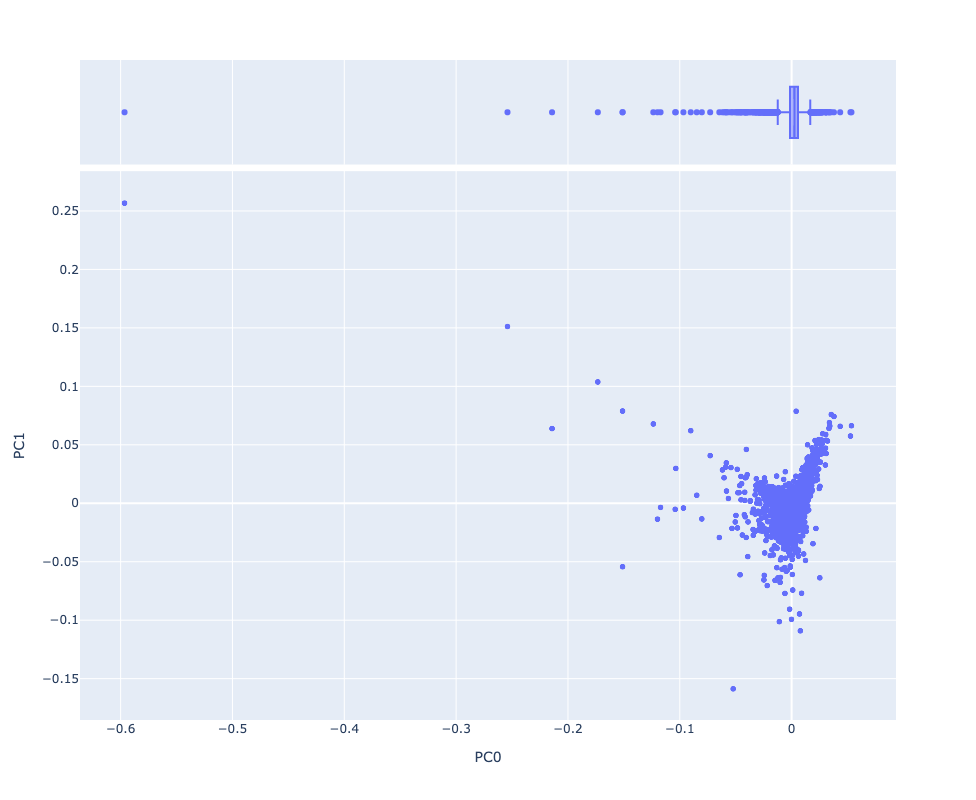

In [237]:
vis_pcs(LOADINGS, 0, 1, hover_name=LOADINGS.index)

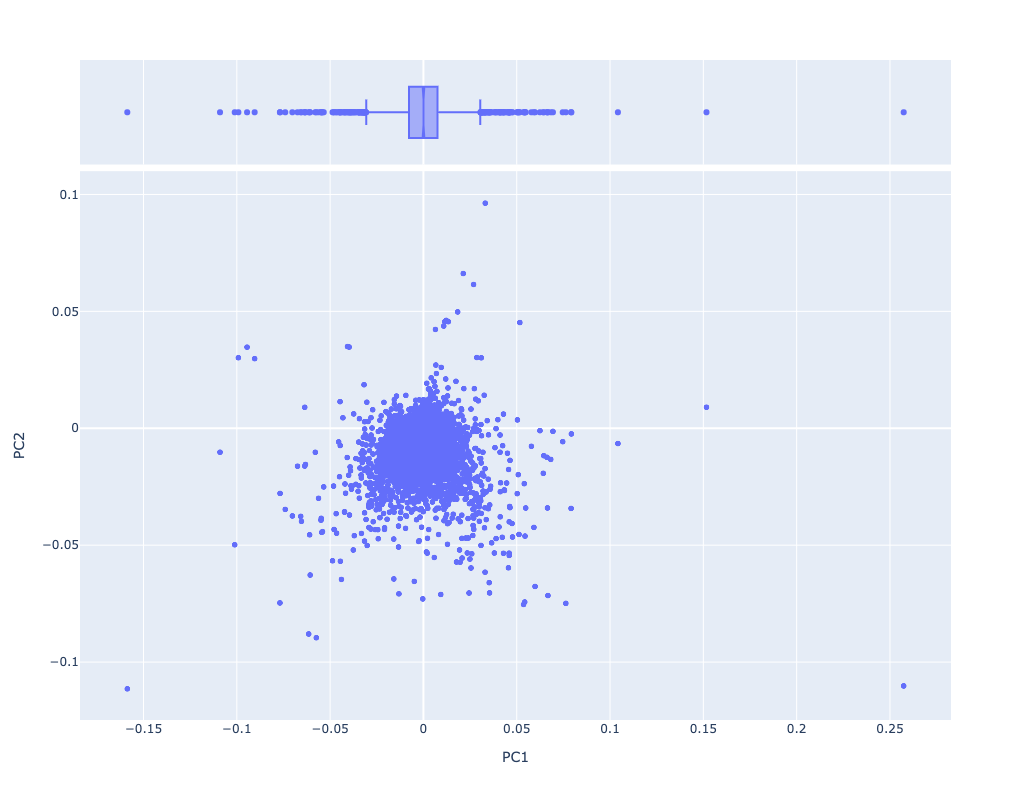

In [238]:
vis_pcs(LOADINGS, 1, 2, hover_name=LOADINGS.index)

## PC 0 and 1

#### Author

In [239]:
#DCM.set_index("speech_id")
#trump1 = DCM[DCM['president'] == 'trump'] 
#hclinton1 = DCM[DCM['president'] == 'hclinton']
#DCM = pd.concat([trump1, hclinton1])

In [240]:
#trump1.shape

In [241]:
#hclinton1.shape

In [242]:
#DCM = DCM.reset_index("speech_id").set_index("speech_id")

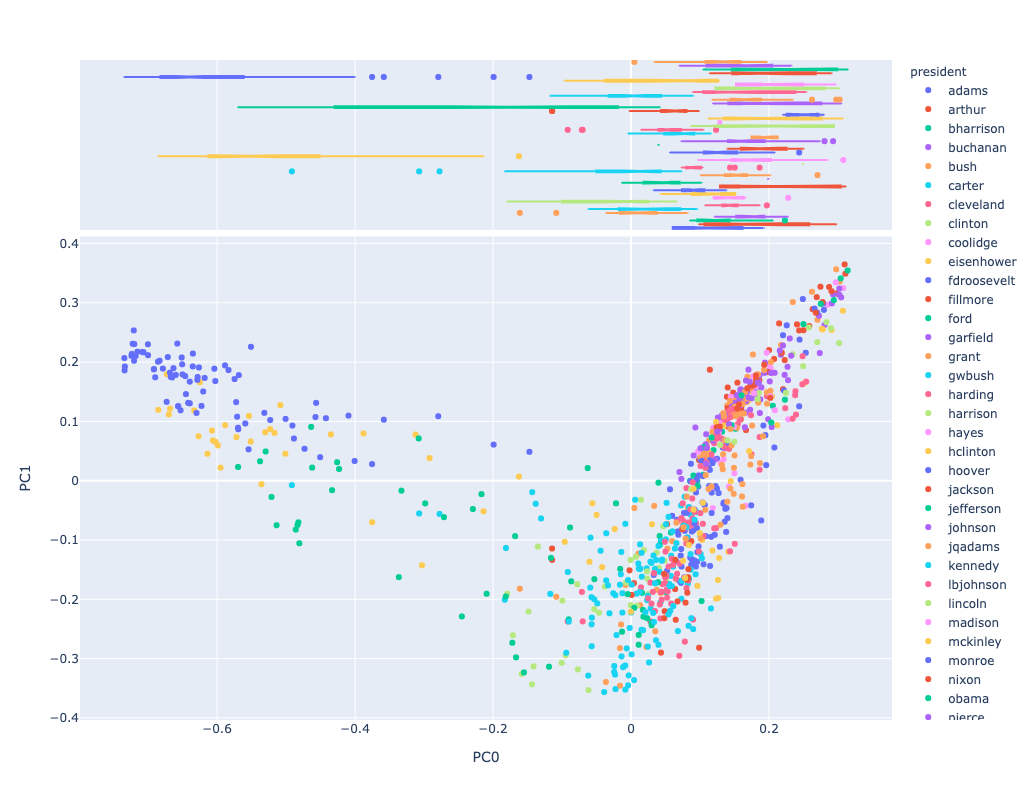

In [243]:
vis_pcs(DCM, 0, 1,label = 'president')

#### Genre

In [244]:
#vis_pcs(DCM, 0, 1, label='speech_title')

#vis_pcs(DCM.reset_index(), label = 'author', hover_name = 'book')

In [245]:
#vis_pcs(DCM, 0, 1, label='speech_title', symbol='president') 

## PC 1 and 2

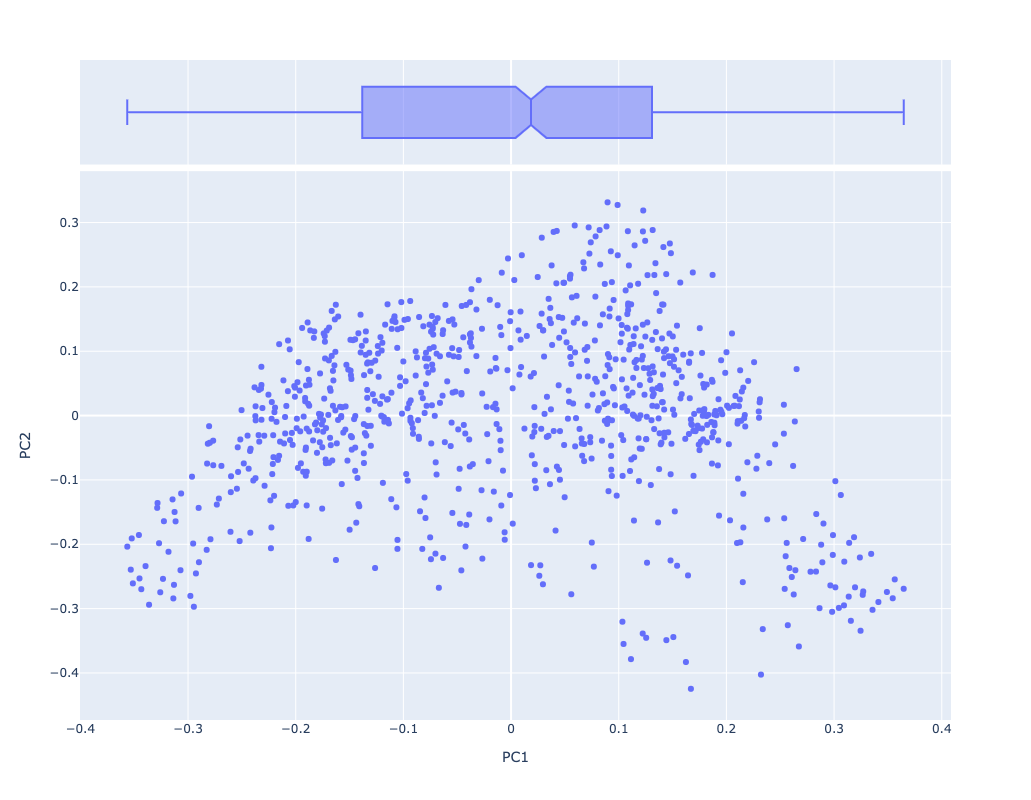

In [246]:
vis_pcs(DCM, 1, 2)

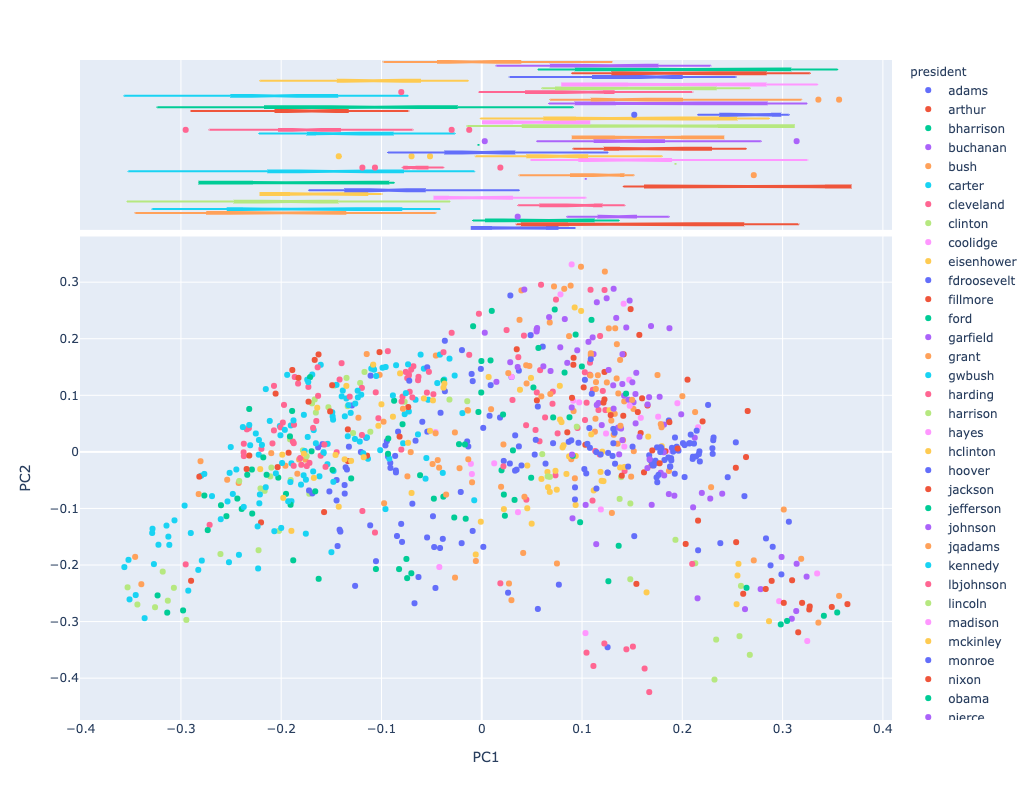

In [247]:
vis_pcs(DCM, 1, 2, label='president')

# PC 2 and 3

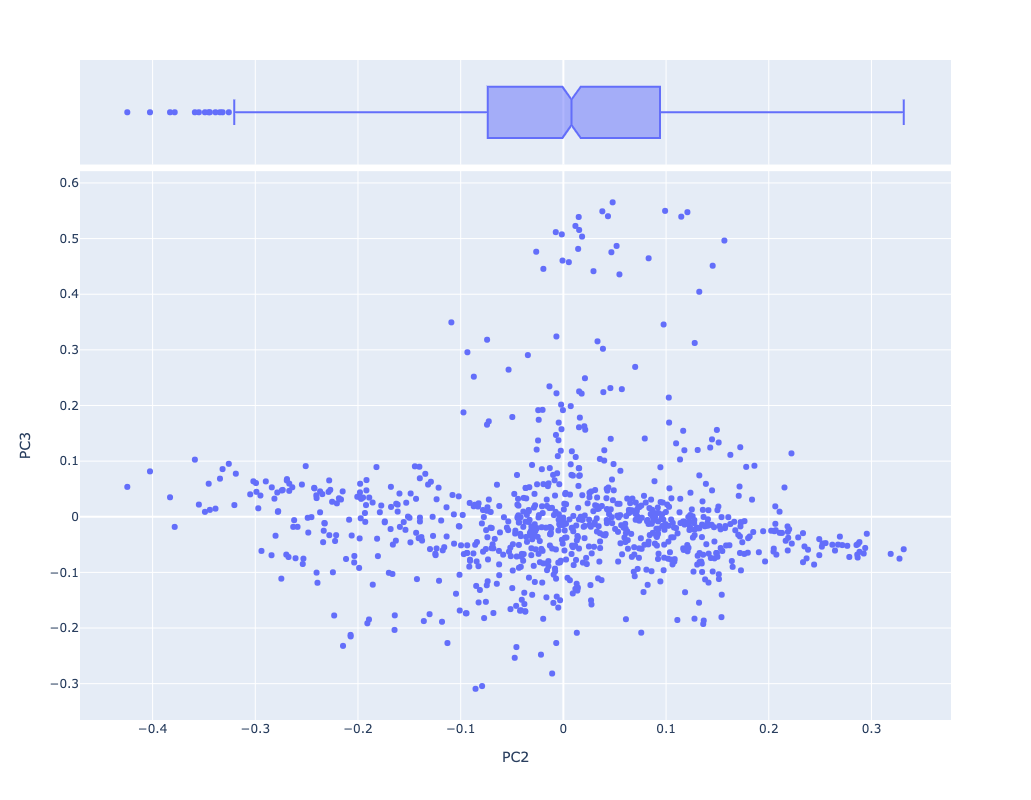

In [248]:
vis_pcs(DCM, 2, 3)

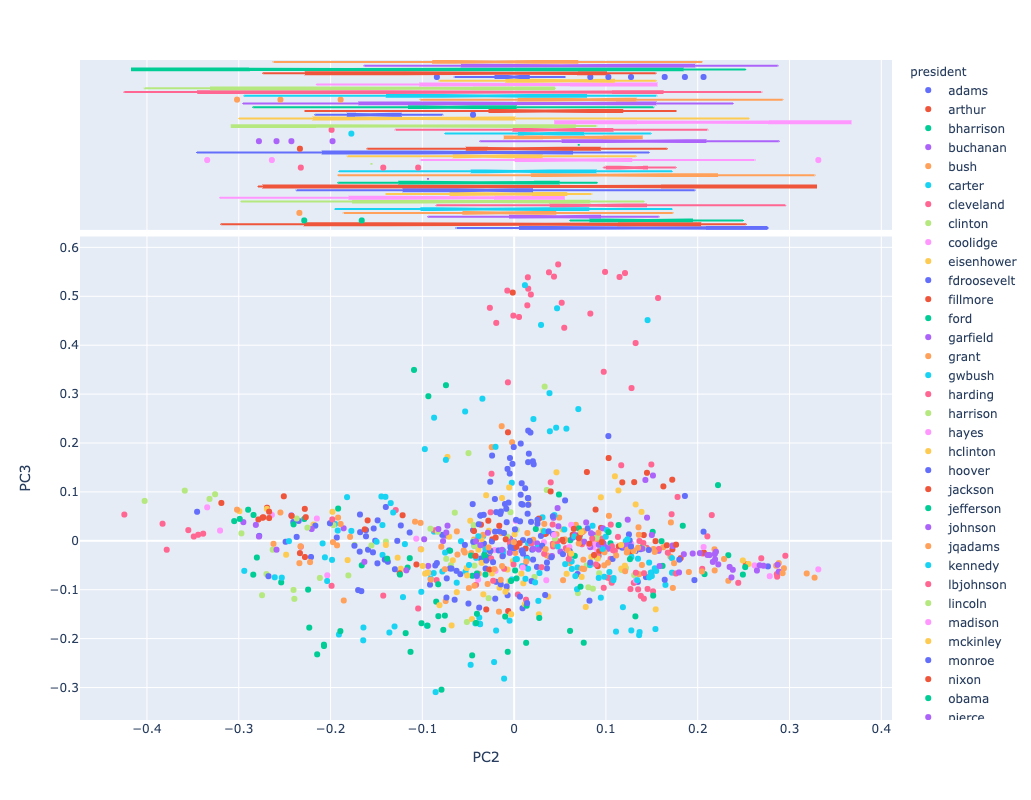

In [249]:
vis_pcs(DCM, 2, 3, label='president')